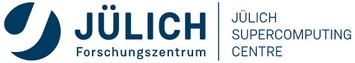 
Author: [Filipe Guimaraes](mailto:f.guimaraes@fz-juelich.de)
--------------------------------------

# Create your own Jupyter pyenv-Kernel

Often the standard kernel do not provide all features you need for your work. This might be that certain modules are not loaded or packages are not installed.
With your own kernel you can overcome that problem easily and define your own environment, in which you work.

This notebook shows you how you can build your own kernel for a **pyenv environment**.

--------------------------------------

## Building your own Jupyter pyenv-kernel is a four-step process

1. **[Download/Install pyenv](#install)**: To start from scratch, and run the full installation.
2. **[Create and setup environment](#environment)**: To create an(other) environment in an existing pyenv setup.
3. **[Create/Edit launch script for the Jupyter kernel](#kernel)**: To setup an environment to be run via Jupyter.
4. **[Create/Edit Jupyter kernel configuration](#json)**: To attach your user to an existing environment via Jupyter.  

If `pyenv` is already installed, start at 2.
If the environment already exists, start at 3.
If the kernel launch script was already created (e.g., by some other user in the project), start at 4.

<a id='settings'></a>
### Settings

To simplifly the process, it is convenient to define a **PYENV_ROOT** path for the central pyenv installation and put on the PATH. 

**Important**: It is recommended to use a folder inside the $PROJECT file system, as the **$HOME** quota is low. It is also useful to share installation for different users in a single project.

In [ ]:
export PYENV_ROOT=${PROJECT_<projectid>}/.pyenv
export PATH="$PYENV_ROOT/bin:$PATH"

Also the environment name can be set in an environment variable **PYENV_ENV** to simplify the process:

In [ ]:
export PYENV_ENV=my_env

These lines can be added to `~/.bash_profile` (and then `source ~/.bash_profile`) to automatically set the PATH in case of restarting the shell.

---
<a id='install'></a>
## 1. Download/Install pyenv

Installing and setting up pyenv from scratch is very simple. A simple command is needed to install pyenv in **$PYENV_ROOT**:

In [ ]:
curl https://pyenv.run | bash

---
<a id='environment'></a>
## 2. Create and setup pyenv environment

The following steps describe how to create and setup a new pyenv environment to be used as a jupyter kernel. They can be repeated if multiple environments are required.

* 2.1 - Activate pyenv and virtual envs

Since it is necessary to activate the environment to install the required modules, the following commands should be added to `~/.bash_profile` to activate pyenv and the virtual environments:

In [ ]:
eval "$(pyenv init --path)"
eval "$(pyenv init -)"
eval "$(pyenv virtualenv-init -)"

And activate the lines

In [ ]:
source ~/.bash_profile

* 2.2 - Install a python version (e.g. `3.10.1`)

In [ ]:
pyenv install 3.10.1

Note: This step may take a few minutes to complete the installation.

* 2.3 - Create a new environment **$PYENV_ENV**

The environment is created using the python version installed above

In [ ]:
pyenv virtualenv 3.10.1 $PYENV_ENV

* 2.4 - Activate and setup the environment

Jupyter requires the `ipykernel` module and its dependencies. To install them, first activate the environment:

In [ ]:
pyenv activate $PYENV_ENV

When the environment is successfully activated, the name of the environment is shown between parenthesis in the command line, e.g. `(my_env)`. (To deactivate the environment, use `pyenv deactivate $PYENV_ENV`.)

The python version can be checked using

In [ ]:
(my_env)$ python --version
Python 3.10.1

The list of python modules is still empty

In [ ]:
(my_env)$ pip list
Package    Version
---------- -------
pip        21.2.4
setuptools 58.1.0

To create a Jupyter kernel, the `ipykernel` and its dependencies are required. `pip` can be used to install it:

In [ ]:
pip install ipykernel

Many modules are installed:

In [ ]:
(my_env)$ pip list
Package           Version
----------------- -------
backcall          0.2.0
debugpy           1.5.1
decorator         5.1.1
entrypoints       0.3
ipykernel         6.6.1
ipython           7.31.0
jedi              0.18.1
jupyter-client    7.1.0
jupyter-core      4.9.1
matplotlib-inline 0.1.3
nest-asyncio      1.5.4
parso             0.8.3
pexpect           4.8.0
pickleshare       0.7.5
pip               21.1.1
prompt-toolkit    3.0.24
ptyprocess        0.7.0
Pygments          2.11.2
python-dateutil   2.8.2
pyzmq             22.3.0
setuptools        56.0.0
six               1.16.0
tornado           6.1
traitlets         5.1.1
wcwidth           0.2.5

---
<a id='kernel'></a>
## 3. Create/Edit launch script for the Jupyter kernel

The following steps describe how to create and configure the launch script of a new Jupyter kernel using a pyenv environment. If the environment was created in the $PROJECT folder, many users of the project can follow these steps to create the kernel. The steps assume the variables described in the **[Settings section](#settings)** are set up. Here, they don't need to be set in `~/.bash_profile` or `~/.bashrc`.

<a id='launch'></a>
* 3.1 - Create kernel script to allow access to the pyenv environment

In [ ]:
echo '#!/bin/bash

module purge

export PYENV_ROOT=$PYENV_ROOT
export PATH="$PYENV_ROOT/bin:$PATH"
eval "$(pyenv init --path)"
eval "$(pyenv init -)"
eval "$(pyenv virtualenv-init -)"

# Activate your Python virtual environment
pyenv activate "${PYENV_ENV}"

exec python -m ipykernel $@' > ${PYENV_ROOT}/versions/${PYENV_ENV}/kernel.sh

Note: the `export` and `eval` lines are repeated here as they are not required to be in `~/.bash_profile` on these steps.

Add executable permission to the script:

In [ ]:
chmod +x ${PYENV_ROOT}/versions/${PYENV_ENV}/kernel.sh

---
## 4. Create/Edit Jupyter kernel configuration

These steps describe how to create a Jupyter kernel configuration file, to be able to access the environment via a Jupyter notebook. To access an existing pyenv environment located in **$PROJECT**, only these steps are necessary. The steps assume the variables described in the **[Settings section](#settings)** are set up.

* 4.1 - Create a folder for the kernel

In [ ]:
mkdir -p $HOME/.local/share/jupyter/kernels/pyenv_${PYENV_ENV}

* 4.2 - Create and adjust the kernel.json file

In [ ]:
echo '{
 "argv": [
  "'"${PYENV_ROOT}"'/versions/'"${PYENV_ENV}"'/kernel.sh",
  "-f",
  "{connection_file}"
 ],
 "display_name": "pyenv_'"${PYENV_ENV}"'",
 "language": "python"
}' > $HOME/.local/share/jupyter/kernels/pyenv_${PYENV_ENV}/kernel.json

Restart of JupyterLab might be necessary to see the kernel in the kernel selection overview.